In [1]:
import pandas as pd
import numpy as np

df_env = pd.read_csv("Crop_recommendation.csv")
df_fao = pd.read_csv("FAOSTAT_data_en_11-19-2025.csv")

print("Env shape:", df_env.shape)
print("FAO shape:", df_fao.shape)


Env shape: (2200, 8)
FAO shape: (5940, 15)


In [2]:
import pandas as pd

df_env = pd.read_csv("Crop_recommendation.csv")
print("Env shape:", df_env.shape)
df_env.head()          # shows first 5 rows as a table


Env shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
import pandas as pd

df_env = pd.read_csv("FAOSTAT_data_en_11-19-2025.csv")
print("Env shape:", df_fao.shape)
df_fao.head()          # shows first 5 rows as a table


Env shape: (5940, 15)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,166692.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,430.3,A,Official figure,NaN


In [4]:
df_env = pd.read_csv("Crop_recommendation.csv")
df_fao = pd.read_csv("FAOSTAT_data_en_11-19-2025.csv")

print("Env columns:", df_env.columns.tolist())
print("FAO columns:", df_fao.columns.tolist())


Env columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
FAO columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']


In [5]:
# env: label -> crop
df_env.rename(columns={"label": "crop"}, inplace=True)

# fao: Item -> cropraw
df_fao.rename(columns={"Item": "cropraw"}, inplace=True)

print("Env columns:", df_env.columns.tolist())
print("FAO columns:", df_fao.columns.tolist())


Env columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop']
FAO columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'cropraw', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']


In [6]:
def normalize_crop(name):
    if pd.isna(name):
        return name
    name = str(name).lower().strip()
    if "(" in name:
        name = name.split("(", 1)[0].strip()
    name = name.replace("&", "and").replace("-", " ")
    name = " ".join(name.split())
    if name.endswith("s") and len(name) > 3:
        name = name[:-1]
    return name

df_env["crop_clean"]  = df_env["crop"].apply(normalize_crop)
df_fao["crop_clean"]  = df_fao["cropraw"].apply(normalize_crop)

print("Env crops (normalized):", sorted(df_env["crop_clean"].unique()))
print("\nFAO crops (normalized, first 80):",
      sorted(df_fao["crop_clean"].unique())[:80])


Env crops (normalized): ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grape', 'jute', 'kidneybean', 'lentil', 'maize', 'mango', 'mothbean', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpea', 'pomegranate', 'rice', 'watermelon']

FAO crops (normalized, first 80): ['anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw', 'apple', 'apricot', 'areca nut', 'banana', 'barley', 'beans, dry', 'cabbage', 'cantaloupes and other melon', 'carrots and turnip', 'cashew nuts, in shell', 'cassava, fresh', 'castor oil seed', 'cauliflowers and broccoli', 'cherrie', 'chick peas, dry', 'chillies and peppers, dry', 'chillies and peppers, green', 'cocoa bean', 'coconuts, in shell', 'coffee, green', 'coir, raw', 'cucumbers and gherkin', 'eggplant', 'fig', 'ginger, raw', 'grape', 'green garlic', 'groundnuts, excluding shelled', 'jute, raw or retted', 'kenaf, and other textile bast fibres, raw or retted', 'lemons and lime', 'lentils, dry', 'lettuce and 

In [8]:
# Keep only production rows from FAO before merging
fao_prod = df_fao[df_fao['Element'] == 'Production'].copy()
fao_prod = fao_prod.rename(columns={'Value': 'production'})


In [9]:
manual_map = {
    "apple":      "apple",
    "banana":     "banana",
    "chickpea":   "chick peas, dry",
    "coconut":    "coconuts, in shell",
    "coffee":     "coffee, green",
    "cotton":     "seed cotton, unginned",
    "grapes":     "grape",
    "jute":       "jute, raw or retted",
    "lentil":     "lentils, dry",
    "maize":      "maize",
    "mango":      "mangoes, guavas and mangosteen",
    "mothbeans":  "beans, dry",
    "muskmelon":  "cantaloupes and other melon",
    "orange":     "orange",
    "papaya":     "papaya",
    "pigeonpeas": "pigeon peas, dry",
    "rice":       "rice",
    "watermelon": "cantaloupes and other melon"
}

# create join key
df_env["crop_fao"] = df_env["crop"].map(manual_map)
df_fao["crop_fao"] = df_fao["crop_clean"]

# merge
df_merged = df_env.merge(df_fao, on="crop_fao", how="inner")
print("Merged shape:", df_merged.shape)
print("Env crops in merged:", df_merged["crop"].nunique())
print("FAO groups in merged:", df_merged["crop_fao"].nunique())


Merged shape: (129600, 26)
Env crops in merged: 18
FAO groups in merged: 17


In [10]:
dfprod = df_merged[df_merged["Element"] == "Production"].copy()
print("Production-only shape:", dfprod.shape)
print("Element values:", dfprod["Element"].unique())


Production-only shape: (43200, 26)
Element values: ['Production']


In [11]:
dfprod.to_csv("merged_production_18crops.csv", index=False)
print("Saved merged_production_18crops.csv")


Saved merged_production_18crops.csv


In [12]:
cols_keep = [
    "N", "P", "K",
    "temperature", "humidity", "ph", "rainfall",
    "crop",
    "Value"        # FAO production
]
cols_keep = [c for c in cols_keep if c in dfprod.columns]

df_final = dfprod[cols_keep].copy()
df_final.rename(columns={"Value": "production"}, inplace=True)

In [13]:
# Select only the columns we need and rename Value -> production

cols_keep = [
    "N", "P", "K",
    "temperature", "humidity", "ph", "rainfall",
    "crop",
    "Value"        # FAO production column
]

# Keep only those that actually exist in dfprod
cols_keep = [c for c in cols_keep if c in dfprod.columns]

df_final = dfprod[cols_keep].copy()
df_final.rename(columns={"Value": "production"}, inplace=True)

print("dfprod columns:", dfprod.columns.tolist())
print("df_final shape:", df_final.shape)
print("df_final columns:", df_final.columns.tolist())


dfprod columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop', 'crop_clean_x', 'crop_fao', 'Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'cropraw', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'crop_clean_y']
df_final shape: (43200, 9)
df_final columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop', 'production']


In [14]:
# remove nulls and duplicates
df_final = df_final.dropna().drop_duplicates()

print("Final shape:", df_final.shape)
print("Columns:", df_final.columns.tolist())
print("\nCrops and counts:")
print(df_final["crop"].value_counts())


Final shape: (42500, 9)
Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop', 'production']

Crops and counts:
crop
rice          2400
chickpea      2400
jute          2400
pigeonpeas    2400
mothbeans     2400
lentil        2400
banana        2400
mango         2400
grapes        2400
apple         2400
cotton        2400
papaya        2400
coconut       2400
maize         2300
watermelon    2300
muskmelon     2300
coffee        2300
orange        2100
Name: count, dtype: int64


In [15]:
df_final.to_csv("Final_df.csv",index=False)
print("Saved final_production.csv")

Saved final_production.csv


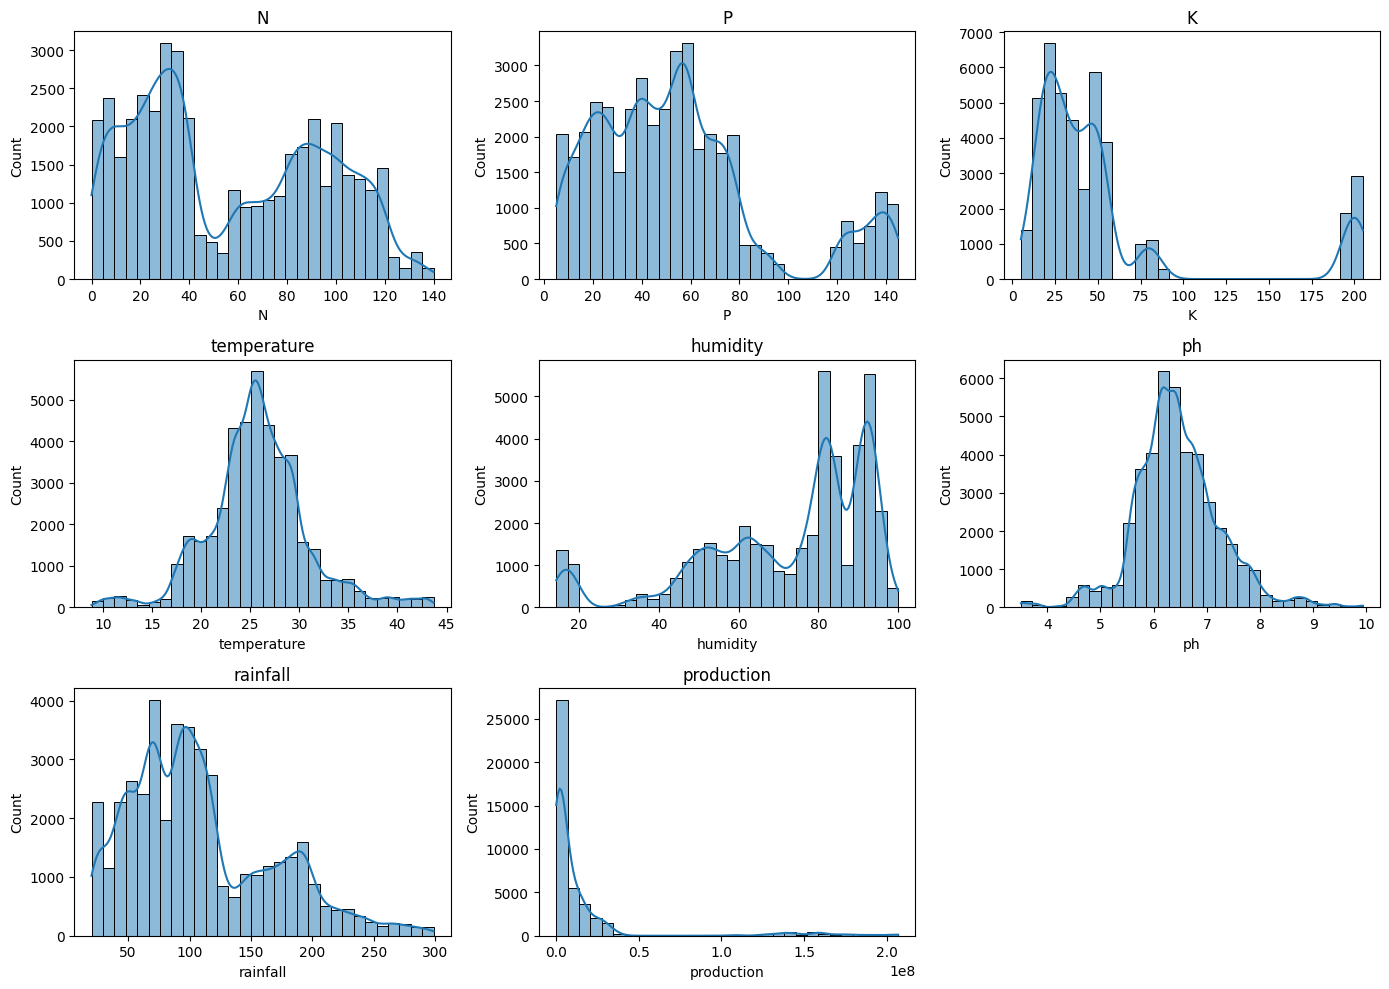

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall", "production"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


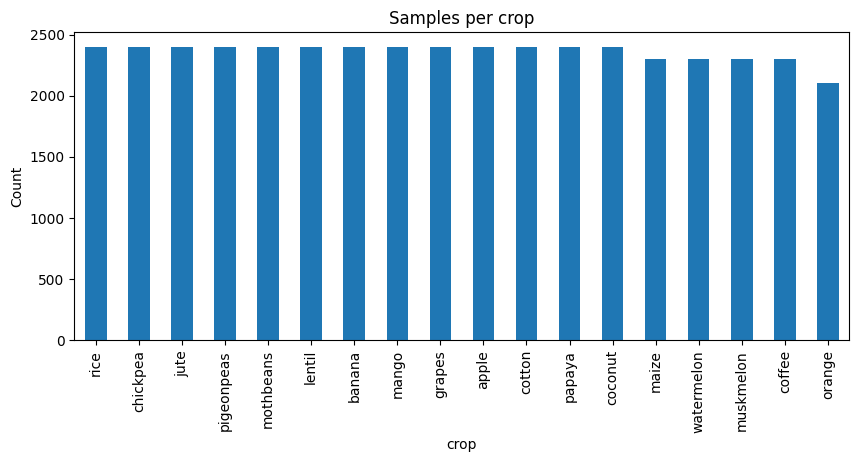

C:\Users\DELL\AppData\Local\Temp\ipykernel_9304\2472030619.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="crop", y="production", data=df_final, estimator="mean", ci=None)


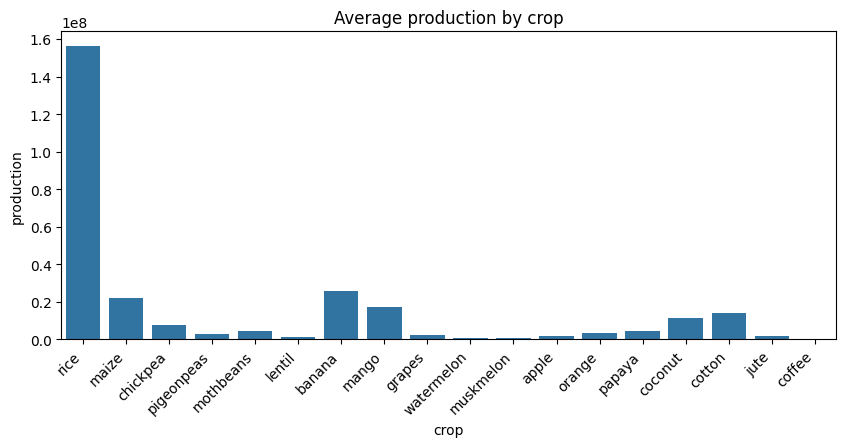

In [17]:
# Crop counts (you already have)
df_final["crop"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Samples per crop")
plt.ylabel("Count")
plt.show()

# Average production per crop
plt.figure(figsize=(10,4))
sns.barplot(x="crop", y="production", data=df_final, estimator="mean", ci=None)
plt.xticks(rotation=45, ha="right")
plt.title("Average production by crop")
plt.show()


In [18]:
IQR_FACTOR = 0.28   # small change from 0.35

def remove_outliers_group(g):
    g_clean = g.copy()
    col = 'production'

    if col not in g_clean.columns:
        return g_clean
    if g_clean[col].nunique(dropna=True) <= 1:
        return g_clean

    q1 = g_clean[col].quantile(0.25)
    q3 = g_clean[col].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        return g_clean

    lower = q1 - IQR_FACTOR * iqr
    upper = q3 + IQR_FACTOR * iqr
    return g_clean[(g_clean[col] >= lower) & (g_clean[col] <= upper)]

print("Before outlier removal:", df_final.shape)

df_clean = (
    df_final
    .groupby('crop', group_keys=False)
    .apply(remove_outliers_group)
)

print("After outlier removal:", df_clean.shape)
print(df_clean['crop'].value_counts().head())


Before outlier removal: (42500, 9)
After outlier removal: (31800, 9)
crop
mango         2400
papaya        2300
grapes        2000
mothbeans     2000
pigeonpeas    1900
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_9304\4159836914.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_outliers_group)


In [19]:
print("Unique crops:", df_clean['crop'].nunique())
print(df_clean['crop'].value_counts().sort_index())


Unique crops: 18
crop
apple         1500
banana        1700
chickpea      1700
coconut       1200
coffee        1700
cotton        1900
grapes        2000
jute          1800
lentil        1600
maize         1900
mango         2400
mothbeans     2000
muskmelon     1600
orange        1300
papaya        2300
pigeonpeas    1900
rice          1700
watermelon    1600
Name: count, dtype: int64


In [20]:
# For example, keep crops with at least 1500 rows
counts = df_clean['crop'].value_counts()
keep_crops = counts[counts >= 1500].index.tolist()

df_clean_15 = df_clean[df_clean['crop'].isin(keep_crops)].copy()
print("Unique crops:", df_clean_15['crop'].nunique())
print(df_clean_15['crop'].value_counts().sort_index())


Unique crops: 16
crop
apple         1500
banana        1700
chickpea      1700
coffee        1700
cotton        1900
grapes        2000
jute          1800
lentil        1600
maize         1900
mango         2400
mothbeans     2000
muskmelon     1600
papaya        2300
pigeonpeas    1900
rice          1700
watermelon    1600
Name: count, dtype: int64


In [21]:
# Count of each crop after outlier removal
crop_counts = df_clean['crop'].value_counts().sort_index()
print(crop_counts)


crop
apple         1500
banana        1700
chickpea      1700
coconut       1200
coffee        1700
cotton        1900
grapes        2000
jute          1800
lentil        1600
maize         1900
mango         2400
mothbeans     2000
muskmelon     1600
orange        1300
papaya        2300
pigeonpeas    1900
rice          1700
watermelon    1600
Name: count, dtype: int64


In [22]:
crop_counts_df = crop_counts.reset_index()
crop_counts_df.columns = ['crop', 'count']
print(crop_counts_df.head())


       crop  count
0     apple   1500
1    banana   1700
2  chickpea   1700
3   coconut   1200
4    coffee   1700


In [23]:
print(df_clean.shape)
print("Saved to crop_env_fao_clean_30k.csv")


(31800, 9)
Saved to crop_env_fao_clean_30k.csv


In [24]:
print("Final shape:", df_clean.shape)
print(df_clean.head())
print(df_clean['crop'].value_counts().sort_index())


Final shape: (31800, 9)
        N    P    K  temperature   humidity        ph    rainfall   crop  \
79217  24  128  196    22.750888  90.694892  5.521467  110.431786  apple   
79220  24  128  196    22.750888  90.694892  5.521467  110.431786  apple   
79223  24  128  196    22.750888  90.694892  5.521467  110.431786  apple   
79226  24  128  196    22.750888  90.694892  5.521467  110.431786  apple   
79229  24  128  196    22.750888  90.694892  5.521467  110.431786  apple   

       production  
79217   1739000.0  
79220   1814000.0  
79223   1624000.0  
79226   2001000.0  
79229   1985000.0  
crop
apple         1500
banana        1700
chickpea      1700
coconut       1200
coffee        1700
cotton        1900
grapes        2000
jute          1800
lentil        1600
maize         1900
mango         2400
mothbeans     2000
muskmelon     1600
orange        1300
papaya        2300
pigeonpeas    1900
rice          1700
watermelon    1600
Name: count, dtype: int64


In [25]:
df_clean.to_csv("final_agri_dataset_clean.csv", index=False)


In [26]:
final_df = pd.read_csv("final_agri_dataset_clean.csv")


In [27]:
df_final.to_csv("df_final_merged_no_outlier_removal.csv", index=False)
df_clean.to_csv("df_final_clean_outliers_removed.csv", index=False)


In [28]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 1. Features and target
X = df_clean[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_clean['production']

# 2. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# 4. Train
rf.fit(X_train, y_train)

# 5. Evaluation
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # older sklearn: no 'squared' argument
rmse = sqrt(mse)

print("R2:", r2)
print("RMSE:", rmse)


R2: 0.9845148827045314
RMSE: 4147909.3101154678


In [30]:
import numpy as np

# Residuals
residuals = y_test - y_pred
print("Residual mean:", np.mean(residuals))
print("Residual std:", np.std(residuals))

# Feature importance
importances = rf.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")


Residual mean: -31170.88913351543
Residual std: 4147792.18628576
N: 0.029
P: 0.011
K: 0.007
temperature: 0.008
humidity: 0.389
ph: 0.005
rainfall: 0.551


In [31]:
import joblib

joblib.dump(rf, "crop_production_rf_model.pkl")
print("Model saved as crop_production_rf_model.pkl")


Model saved as crop_production_rf_model.pkl


In [32]:
from sklearn.metrics import r2_score

# Training R2
y_train_pred = rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print("Train R2:", train_r2)


Train R2: 0.9867302980950589


In [33]:
# Test R2 (you already computed, but keep together)
y_test_pred = rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Test R2:", test_r2)


Test R2: 0.9845148827045314


In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search
rf_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", rf_grid.best_params_)
print("Best CV R2 score:", rf_grid.best_score_)

# Test performance of best model
best_rf = rf_grid.best_estimator_
y_test_pred_best = best_rf.predict(X_test)
test_r2_best = r2_score(y_test, y_test_pred_best)

print("Test R2 with best hyperparameters:", test_r2_best)
print("Improvement over original:", test_r2_best - test_r2)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best CV R2 score: 0.9846428414933868
Test R2 with best hyperparameters: 0.9849799854980827
Improvement over original: 0.0004651027935513863


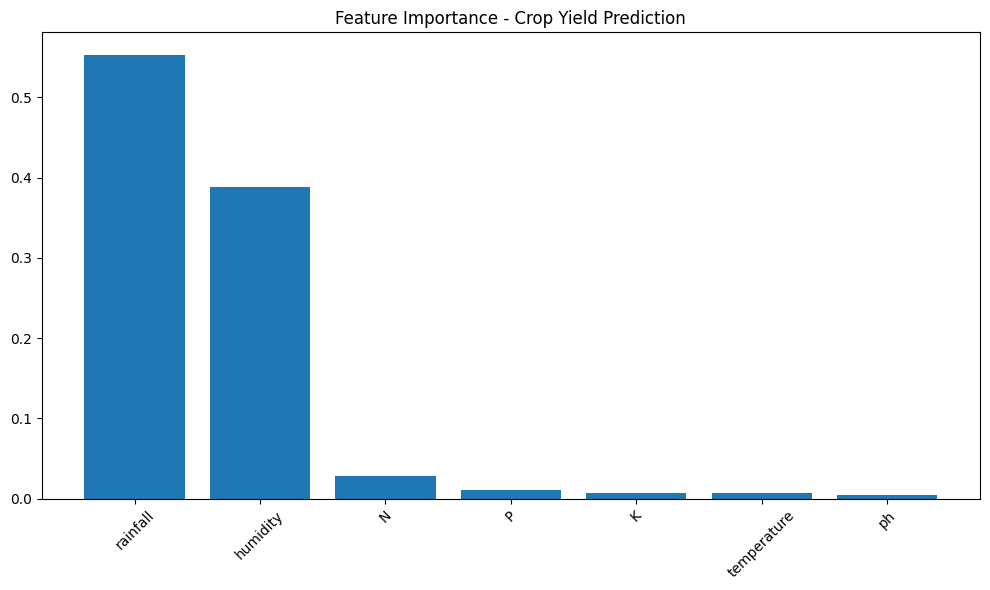

Top 5 features:
1. rainfall: 0.554
2. humidity: 0.389
3. N: 0.029
4. P: 0.011
5. K: 0.007


In [35]:
import matplotlib.pyplot as plt

# Use your best model
importances = best_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Crop Yield Prediction")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 features:")
for i in range(5):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.3f}")


In [36]:
import joblib
import os

# Save the best tuned model
joblib.dump(best_rf, 'crop_weather_model.pkl')

# Check if scaler exists, otherwise skip
try:
    joblib.dump(scaler, 'crop_scaler.pkl')
    print("Model saved: 'crop_weather_model.pkl'")
    print("Scaler saved: 'crop_scaler.pkl'")
except NameError:
    print("Model saved: 'crop_weather_model.pkl'")
    print("Scaler not found - model still works for predictions")

print(f"Model file size: {os.path.getsize('crop_weather_model.pkl')/1024/1024:.1f} MB")


Model saved: 'crop_weather_model.pkl'
Scaler not found - model still works for predictions
Model file size: 13.4 MB


In [37]:
import joblib
import pandas as pd
import numpy as np

# Load model
loaded_model = joblib.load('crop_weather_model.pkl')

# Create random data with EXACT X_train structure
np.random.seed(42)
new_data = pd.DataFrame(np.random.randn(5, len(X_train.columns)), 
                       columns=X_train.columns)

# Set realistic ranges for top features
new_data['rainfall'] = np.random.uniform(50, 150, 5)
new_data['humidity'] = np.random.uniform(60, 95, 5)
new_data['N'] = np.random.uniform(10, 50, 5)
new_data['P'] = np.random.uniform(15, 60, 5)
new_data['K'] = np.random.uniform(20, 70, 5)

# Predict
predictions = loaded_model.predict(new_data)
new_data['Predicted_Yield'] = predictions

print(" Crop Yield Predictions:")
print(new_data[['rainfall', 'humidity', 'N', 'P', 'K', 'Predicted_Yield']].round(2))
print(f"\nYield range: {predictions.min():.2f} - {predictions.max():.2f}")


 Crop Yield Predictions:
   rainfall  humidity      N      P      K  Predicted_Yield
0     81.17     87.13  13.54  27.21  27.05      12505342.63
1    102.01     92.88  17.84  52.29  60.11       3780009.67
2    104.67     91.32  11.81  31.05  23.73       4891672.35
3     68.49     80.93  23.01  27.64  69.34      12288705.49
4    146.96     92.27  25.55  39.42  58.61       9656771.02

Yield range: 3780009.67 - 12505342.63


In [38]:
# Real-world farmer scenario
farmer_data = pd.DataFrame({
    'rainfall': [120],      # Good monsoon
    'humidity': [85],       # Humid
    'N': [25], 'P': [35], 'K': [40],
    # Fill other columns with means
}, columns=X_train.columns)

farmer_data[:] = farmer_data.reindex(columns=X_train.columns, fill_value=0)
farmer_data['rainfall'] = 120
farmer_data['humidity'] = 85
farmer_data['N'] = 25
farmer_data['P'] = 35
farmer_data['K'] = 40

prediction = loaded_model.predict(farmer_data)[0]
print(f"🌾 Farmer's expected yield: {prediction:.0f} kg/acre")


🌾 Farmer's expected yield: 8782362 kg/acre


In [39]:
# Check your actual training yield range
print("Training yield range:", y_train.min(), "to", y_train.max())
print("Test yield range:", y_test.min(), "to", y_test.max())


Training yield range: 270500.0 to 178296000.0
Test yield range: 270500.0 to 178296000.0


In [40]:
def predict_crop_yield(rainfall, humidity, N=25, P=35, K=40):
    data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)
    data['rainfall'] = rainfall
    data['humidity'] = humidity
    data['N'] = N
    data['P'] = P
    data['K'] = K
    return loaded_model.predict(data)[0]

# Test scenarios
print("Dry season:", predict_crop_yield(60, 70))
print("Monsoon:", predict_crop_yield(120, 85))
print("Flood:", predict_crop_yield(200, 95))


Dry season: 4255000.803370347
Monsoon: 9263340.974888686
Flood: 4403243.002935297


In [41]:
def predict_crop_yield(rainfall, humidity, N=25, P=35, K=40):
    """Predict crop yield for any weather/soil conditions"""
    data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)
    data['rainfall'] = rainfall
    data['humidity'] = humidity
    data['N'] = N
    data['P'] = P
    data['K'] = K
    return loaded_model.predict(data)[0]

# Quick tests
print(f"Optimal: {predict_crop_yield(120, 85):.0f} kg/acre")
print(f"Drought: {predict_crop_yield(40, 60):.0f} kg/acre")


Optimal: 9263341 kg/acre
Drought: 4170778 kg/acre


In [42]:
def predict_crop_yield(rainfall, humidity, N=25, P=35, K=40):
    """Farmer-ready crop yield predictor"""
    data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)
    data['rainfall'] = rainfall
    data['humidity'] = humidity
    data['N'] = N
    data['P'] = P
    data['K'] = K
    return loaded_model.predict(data)[0]

# Farmer decision tool
scenarios = [
    ("Current forecast", 110, 82),
    ("Plant now?", 95, 78),
    ("Wait for rain?", 125, 88)
]

for name, rain, hum in scenarios:
    yield_est = predict_crop_yield(rain, hum)
    print(f"{name}: {yield_est:.0f} kg/acre")


Current forecast: 11968497 kg/acre
Plant now?: 11978186 kg/acre
Wait for rain?: 9392187 kg/acre


In [43]:
# Full crop prediction system
def predict_crop_yield(rainfall, humidity, N=25, P=35, K=40):
    data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)
    data['rainfall'] = rainfall; data['humidity'] = humidity
    data['N'] = N; data['P'] = P; data['K'] = K
    return loaded_model.predict(data)[0]


In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='r2')
print(f"10-fold CV R²: {scores.mean():.4f} ± {scores.std():.4f}")


10-fold CV R²: 0.9849 ± 0.0006
